In [13]:
# add ../../utils to the path
import sys
sys.path.append('../../utils')

from src_rec_file_helper import *

# read file
fpath = "./OUTPUT_FILES/src_rec_file_forward.dat"
event_list = read_src_rec_file(fpath)

number of events:  100


In [14]:
event_list[0]

AttEvent class object: 
id: 0
year: 1998
month: 1
day: 1
hour: 0
minute: 0
sec: 0.0
lat: 29.65
lon: 14.9
dep: 270.9
mag: 3.0
nrec: 4
id_event: 1000

In [15]:
# copy event list
import copy
event_list_ori = copy.deepcopy(event_list)

In [16]:
# modify source location
# slightly shift the source location towards the center of the domain
import math

tt1=(30.0-1.5)
tt2=(50.0+1.5)
pp1=(15.0-1.5)
pp2=(40.0+1.5)

center_lon = (pp1+pp2)/2
center_lat = (tt1+tt2)/2

# shift amount is 5 %
factor_shift =  0.05

for event in event_list:
    # shift direction vector
    v_lon = center_lon - event.lon
    v_lat = center_lat - event.lat

    event.lon += v_lon * factor_shift 
    event.lat += v_lat * factor_shift 


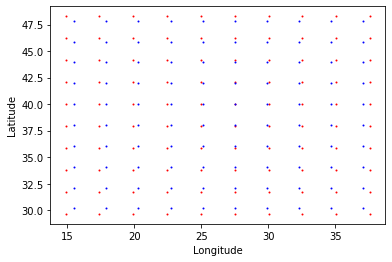

In [17]:
# plot original and modified source location
import matplotlib.pyplot as plt

for event in event_list_ori:
    plt.plot(event.lon, event.lat, color="red", marker="o", markersize=1)

for event in event_list:
    plt.plot(event.lon, event.lat, color="blue", marker="o", markersize=1)

plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()

In [18]:
# write out
fpath="src_rec_test_out_modified.dat"
write_event_list(event_list, fpath)